In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np

In [3]:
epl = pd.read_csv("epl.csv")
epl.head()

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,2015-2016,1987,27,Swansea City,Portugal,5500000,4500000,FW,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,2017-2018,1992,25,Chelsea,Spain,44000000,58500000,FW,31,...,4,6,41,0,13,0,0,20,54,59
2,Álvaro Morata,2018-2019,1992,25,Chelsea,Spain,58500000,45000000,FW,16,...,1,0,19,0,8,0,0,6,18,28
3,Álvaro Negredo,2016-2017,1985,30,Middlesbrough,Spain,8250000,6750000,FW,36,...,3,10,45,0,18,0,0,65,175,177
4,Aaron Cresswell,2018-2019,1989,28,West Ham United,England,13200000,9900000,DF,20,...,7,23,2,1,29,0,0,42,25,18


In [4]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 40 columns):
Player                   1468 non-null object
Season                   1468 non-null object
Born                     1468 non-null int64
Age                      1468 non-null int64
Squad                    1468 non-null object
Nation                   1468 non-null object
Previous Market Value    1468 non-null int64
Market Value             1468 non-null int64
Position                 1468 non-null object
App                      1468 non-null int64
Minutes                  1468 non-null int64
Goals                    1468 non-null int64
Passes                   1468 non-null int64
Assists                  1468 non-null int64
Yellow                   1468 non-null int64
Red                      1468 non-null int64
SubOn                    1468 non-null int64
SubOff                   1468 non-null int64
Shots                    1468 non-null int64
SOT                      1468 non

In [5]:
epl['Position'].value_counts()

MF    575
DF    527
FW    366
Name: Position, dtype: int64

In [6]:
cleanup_position={"Position":{"MF":1,"DF":2,"FW":3}}

In [7]:
epl.replace(cleanup_position,inplace=True)
epl.head()

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,2015-2016,1987,27,Swansea City,Portugal,5500000,4500000,3,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,2017-2018,1992,25,Chelsea,Spain,44000000,58500000,3,31,...,4,6,41,0,13,0,0,20,54,59
2,Álvaro Morata,2018-2019,1992,25,Chelsea,Spain,58500000,45000000,3,16,...,1,0,19,0,8,0,0,6,18,28
3,Álvaro Negredo,2016-2017,1985,30,Middlesbrough,Spain,8250000,6750000,3,36,...,3,10,45,0,18,0,0,65,175,177
4,Aaron Cresswell,2018-2019,1989,28,West Ham United,England,13200000,9900000,2,20,...,7,23,2,1,29,0,0,42,25,18


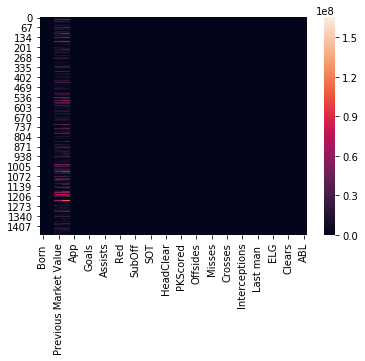

In [8]:
sns.heatmap(epl.drop(['Player', 'Season','Nation','Squad','Position'], axis = 1))

In [9]:
epl['Season'].value_counts()

2015-2016    376
2018-2019    367
2016-2017    366
2017-2018    359
Name: Season, dtype: int64

In [10]:
cleanup_season={"Season":{"2015-2016":1,"2016-2017":2,"2017-2018":3,"2018-2019":4}}

In [11]:
epl.replace(cleanup_season,inplace=True)
epl.head()

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,1,1987,27,Swansea City,Portugal,5500000,4500000,3,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,3,1992,25,Chelsea,Spain,44000000,58500000,3,31,...,4,6,41,0,13,0,0,20,54,59
2,Álvaro Morata,4,1992,25,Chelsea,Spain,58500000,45000000,3,16,...,1,0,19,0,8,0,0,6,18,28
3,Álvaro Negredo,2,1985,30,Middlesbrough,Spain,8250000,6750000,3,36,...,3,10,45,0,18,0,0,65,175,177
4,Aaron Cresswell,4,1989,28,West Ham United,England,13200000,9900000,2,20,...,7,23,2,1,29,0,0,42,25,18


Now I am going to break into Defenders, Midfielders, Forwards

In [12]:
epl.sort_values(by='Position', axis=0, inplace=True)
# set the index to be this and don't drop
# get a list of names
names=epl['Position'].unique().tolist()
# now we can perform a lookup on a 'view' of the dataframe
Fwd = epl.loc[epl.Position==3]

In [13]:
Fwd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1204 to 1467
Data columns (total 40 columns):
Player                   366 non-null object
Season                   366 non-null int64
Born                     366 non-null int64
Age                      366 non-null int64
Squad                    366 non-null object
Nation                   366 non-null object
Previous Market Value    366 non-null int64
Market Value             366 non-null int64
Position                 366 non-null int64
App                      366 non-null int64
Minutes                  366 non-null int64
Goals                    366 non-null int64
Passes                   366 non-null int64
Assists                  366 non-null int64
Yellow                   366 non-null int64
Red                      366 non-null int64
SubOn                    366 non-null int64
SubOff                   366 non-null int64
Shots                    366 non-null int64
SOT                      366 non-null int64
HitPost 

In [14]:
def change_in_price(df):
    df_new =(df['Market Value']-df['Previous Market Value'])/1000000
    return df_new

In [15]:
a = change_in_price(Fwd)

In [16]:
df2 = Fwd.assign(Change = a)  
df2 

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL,Change
1204,Romelu Lukaku,1,1993,22,Everton,Belgium,30800000,36000000,3,37,...,0,30,0,13,0,0,5,93,144,5.20
1197,Roberto Firmino,3,1991,25,Liverpool,Brazil,34500000,72000000,3,37,...,18,57,0,65,0,0,9,46,136,37.50
1198,Roberto Firmino,4,1991,26,Liverpool,Brazil,72000000,72000000,3,34,...,6,38,0,29,0,0,15,30,76,0.00
1187,Robbie Brady,1,1992,23,Norwich City,Ireland,2200000,5400000,3,36,...,57,41,1,101,1,0,89,42,26,3.20
1195,Roberto Firmino,1,1991,23,Liverpool,Brazil,27500000,31500000,3,22,...,16,29,0,67,1,0,12,9,62,4.00
1196,Roberto Firmino,2,1991,24,Liverpool,Brazil,31500000,34500000,3,35,...,26,51,0,58,0,0,14,64,142,3.00
0,Éder,1,1987,27,Swansea City,Portugal,5500000,4500000,3,13,...,0,11,0,4,0,0,7,9,20,-1.00
1206,Romelu Lukaku,3,1993,24,Manchester United,Belgium,45000000,81000000,3,34,...,3,31,0,7,1,0,21,109,100,36.00
1386,Victor Anichebe,1,1988,27,West Bromwich Albion,Nigeria,3850000,1800000,3,10,...,2,2,0,2,0,0,8,28,19,-2.05
1380,Troy Deeney,4,1988,30,Watford,England,9000000,9000000,3,32,...,7,42,0,24,0,0,28,209,228,0.00


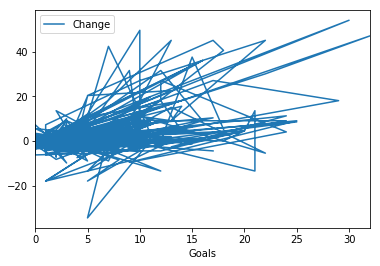

In [22]:
df2.plot(x='Goals', y='Change')

In [29]:
grouped = Fwd.groupby(['Player','Season'], sort=True )

In [30]:
grouped.first()

Born   Age                     Squad  \
Player              Season                                         
Abel Hernández      2        1990   25                 Hull City   
Aboubakar Kamara    4        1995   23                    Fulham   
Adama Diakhaby      4        1996   22         Huddersfield Town   
Adama Diomande      2        1990   26                 Hull City   
Adama Traoré        1        1996   19               Aston Villa   
                    4        1996   22                    Wolves   
Ademola Lookman     4        1997   20                   Everton   
Ahmed Musa          2        1992   23            Leicester City   
Alberto Paloschi    1        1990   25              Swansea City   
Aleksandar Mitrovic 1        1994   21          Newcastle United   
                    4        1994   24                    Fulham   
Alex Iwobi          1        1996   19                   Arsenal   
                    2        1996   20                   Arsenal   
                    3        1996   21                   Arsenal   
                    4        1996   22                   Arsenal   
Alexander Sørloth   4        1995   22            Crystal Palace   
Alexandre Lacazette 3        1991   26                   Arsenal   
                    4        1991   27                   Arsenal   
Alexis Sanchez      1        1988   26                   Arsenal   
                    2        1988   28                   Arsenal   
                    3        1988   29                   Arsenal   
                    4        1988   29         Manchester United   
Andre Gray          2        1991   25                   Burnley   
                    3        1991   26                   Watford   
                    4        1991   27                   Watford   
Andros Townsend     1        1991   24          Newcastle United   
André Ayew          1        1989   25              Swansea City   
                    2        1989   26           West Ham United   
                    3        1989   28              Swansea City   
Andy Carroll        1        1989   26           West Ham United   
...                           ...  ...                       ...   
Tomer Hemed         3        1987   30  Brighton and Hove Albion   
Troy Deeney         1        1988   27                   Watford   
                    2        1988   28                   Watford   
                    3        1988   29                   Watford   
                    4        1988   30                   Watford   
Victor Anichebe     1        1988   27      West Bromwich Albion   
                    2        1988   28                Sunderland   
Victor Moses        1        1990   24           West Ham United   
                    2        1990   25                   Chelsea   
Vincent Janssen     2        1994   22                 Tottenham   
Wahbi Khazri        1        1991   24                Sunderland   
Wayne Rooney        1        1985   29         Manchester United   
                    2        1985   30         Manchester United   
                    3        1985   32                   Everton   
Wilfried Bony       1        1988   26           Manchester City   
                    2        1988   27                Stoke City   
                    3        1988   29              Swansea City   
Wilfried Zaha       1        1992   22            Crystal Palace   
                    2        1992   23            Crystal Palace   
                    3        1992   25            Crystal Palace   
                    4        1992   25            Crystal Palace   
Willian             1        1988   26                   Chelsea   
                    2        1988   27                   Chelsea   
                    4        1988   29                   Chelsea   
Yoshinori Muto      4        1992   26          Newcastle United   
Zlatan Ibrahimovic  2        1981   35         Manchester United   
Álvaro Morata   